In [2]:
# -- Use the following line for google colab removing the hash at the beginning.
! pip install -q 'corner==2.2.2' 'bilby==2.2.2' 'astropy==6.0.1'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import corner

In [7]:
#label = 'GW150914'

# if you do not have wget installed, simply download manually
# https://dcc.ligo.org/LIGO-P1800370/public/GW150914_GWTC-1.hdf5
# from your browser
! wget https://zenodo.org/records/6513631/files/IGWN-GWTC2p1-v2-GW190403_051519_PEDataRelease_mixed_cosmo.h5

--2024-07-01 20:48:17--  https://zenodo.org/records/6513631/files/IGWN-GWTC2p1-v2-GW190403_051519_PEDataRelease_mixed_cosmo.h5
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.184.98.238, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18602535 (18M) [application/octet-stream]
Saving to: ‘IGWN-GWTC2p1-v2-GW190403_051519_PEDataRelease_mixed_cosmo.h5.1’

IGWN-GWTC2p1-v2-GW1 100%[===================>]  17.74M  13.1MB/s    in 1.4s    

2024-07-01 20:48:19 (13.1 MB/s) - ‘IGWN-GWTC2p1-v2-GW190403_051519_PEDataRelease_mixed_cosmo.h5.1’ saved [18602535/18602535]



In [8]:
# Load the posterior data
#posterior_file = './' + label + '_GWTC-1.hdf5'
posterior_file = "/content/IGWN-GWTC2p1-v2-GW190403_051519_PEDataRelease_mixed_cosmo.h5.1"
posterior = h5py.File(posterior_file, 'r')

# Convert to DataFrame
samples = pd.DataFrame.from_records(np.array(posterior['C01:IMRPhenomXPHM']['posterior_samples']))

# Print datasets and names
print('This file contains four datasets: ', posterior.keys())
print(posterior['C01:IMRPhenomXPHM']['posterior_samples'].dtype.names)

This file contains four datasets:  <KeysViewHDF5 ['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']>
('chirp_mass', 'mass_ratio', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'theta_jn', 'psi', 'phase', 'azimuth', 'zenith', 'recalib_H1_amplitude_0', 'recalib_H1_amplitude_1', 'recalib_H1_amplitude_2', 'recalib_H1_amplitude_3', 'recalib_H1_amplitude_4', 'recalib_H1_amplitude_5', 'recalib_H1_amplitude_6', 'recalib_H1_amplitude_7', 'recalib_H1_amplitude_8', 'recalib_H1_amplitude_9', 'recalib_H1_phase_0', 'recalib_H1_phase_1', 'recalib_H1_phase_2', 'recalib_H1_phase_3', 'recalib_H1_phase_4', 'recalib_H1_phase_5', 'recalib_H1_phase_6', 'recalib_H1_phase_7', 'recalib_H1_phase_8', 'recalib_H1_phase_9', 'recalib_L1_amplitude_0', 'recalib_L1_amplitude_1', 'recalib_L1_amplitude_2', 'recalib_L1_amplitude_3', 'recalib_L1_amplitude_4', 'recalib_L1_amplitude_5', 'recalib_L1_amplitude_6', 'recalib_L1_amplitude_7', 'recalib_L1_amplitude_8', 'recalib_L1_amplitude_9', 'r

In [9]:
print(posterior['C01:IMRPhenomXPHM']['posterior_samples'])

<HDF5 dataset "posterior_samples": shape (11138,), type "|V1376">


In [10]:
samples=pd.DataFrame.from_records(np.array(posterior['C01:IMRPhenomXPHM']['posterior_samples']))

In [11]:
samples

,chirp_mass,mass_ratio,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,theta_jn,psi,...,chi_p_2spin,spin_1z_infinity_only_prec_avg,spin_2z_infinity_only_prec_avg,chi_eff_infinity_only_prec_avg,chi_p_infinity_only_prec_avg,beta,psi_J,cos_tilt_1_infinity_only_prec_avg,cos_tilt_2_infinity_only_prec_avg,viewing_angle
0,43.293735,0.160905,0.897270,0.842178,0.826472,0.876597,2.422444,2.860666,0.361923,1.906061,...,0.636798,0.594695,0.620730,0.598304,0.671886,0.438461,4.571245,0.662783,0.737054,0.361923
1,82.206415,0.252931,0.941830,0.660600,0.456798,1.111340,4.554039,3.288844,0.337377,1.400737,...,0.396145,0.840942,0.310036,0.733767,0.424099,0.211527,3.503697,0.892881,0.469325,0.337377
2,82.529469,0.260287,0.915416,0.438022,0.227166,1.134665,1.555796,1.791183,2.838034,2.293022,...,0.202858,0.891361,0.187101,0.745910,0.208479,0.104432,3.921539,0.973721,0.427150,0.303559
3,83.554165,0.853210,0.917478,0.407772,0.704694,0.403288,3.791176,0.808793,2.598366,2.684997,...,0.453651,0.716088,0.354965,0.549828,0.573570,0.105956,4.130461,0.780497,0.870498,0.543226
4,75.296340,0.170537,0.986554,0.243479,0.628738,0.757616,2.235923,3.516131,2.707840,1.790544,...,0.574431,0.794825,0.194888,0.707419,0.584416,0.367665,4.247890,0.805658,0.800431,0.433753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,73.358075,0.252573,0.820307,0.337771,0.333091,0.593161,3.647238,2.755383,0.524199,1.421220,...,0.254673,0.771166,0.296125,0.675377,0.279656,0.136615,3.264522,0.940094,0.876704,0.524199
11134,67.908234,0.202448,0.811057,0.540609,0.181437,0.702662,2.678049,0.880366,0.545850,2.447891,...,0.131808,0.794291,0.429607,0.732892,0.164058,0.079412,3.910517,0.979328,0.794672,0.545850
11135,109.325455,0.815588,0.957439,0.421981,0.251359,0.312188,6.156141,2.949095,0.745576,2.122986,...,0.298135,0.955222,0.367412,0.691169,0.164433,0.070891,3.797680,0.997685,0.870683,0.745576
11136,102.504152,0.860886,0.784433,0.815375,0.886559,0.400940,6.090210,2.644616,0.983005,0.394917,...,0.680137,0.684741,0.531268,0.613741,0.521238,0.178092,2.164712,0.872912,0.651563,0.983005


In [12]:
_df_5 = samples

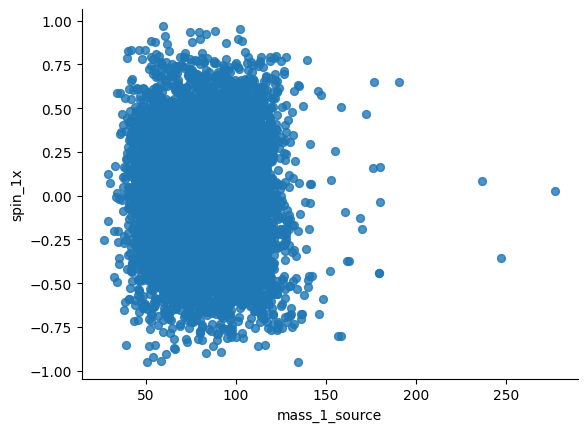

In [13]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mass_1_source', y='spin_1x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
# Calculate maximum likelihood values for spins, costilts, and masses
max_likelihood_spin1 = samples['a_1'].mode()[0]
max_likelihood_spin2 = samples['a_2'].mode()[0]
max_likelihood_costilt1 = samples['tilt_1'].mode()[0]
max_likelihood_costilt2 = samples['tilt_2'].mode()[0]
max_likelihood_mass1 = samples['mass_1'].mode()[0]
max_likelihood_mass2 = samples['mass_2'].mode()[0]

# Print results
print(f"Maximum Likelihood spin1: {max_likelihood_spin1}, spin2: {max_likelihood_spin2}")
print(f"Maximum Likelihood tilt1: {max_likelihood_costilt1}, tilt2: {max_likelihood_costilt2}")
print(f"Maximum Likelihood mass1: {max_likelihood_mass1}, mass2: {max_likelihood_mass2}")

Maximum Likelihood spin1: 0.6986273555861829, spin2: 0.055841726014264584
Maximum Likelihood tilt1: 0.08688460789945963, tilt2: 0.1478773919952728
Maximum Likelihood mass1: 117.57745120323692, mass2: 13.579511751090301


In [15]:
for key in samples.keys():
    print(key)

chirp_mass
mass_ratio
a_1
a_2
tilt_1
tilt_2
phi_12
phi_jl
theta_jn
psi
phase
azimuth
zenith
recalib_H1_amplitude_0
recalib_H1_amplitude_1
recalib_H1_amplitude_2
recalib_H1_amplitude_3
recalib_H1_amplitude_4
recalib_H1_amplitude_5
recalib_H1_amplitude_6
recalib_H1_amplitude_7
recalib_H1_amplitude_8
recalib_H1_amplitude_9
recalib_H1_phase_0
recalib_H1_phase_1
recalib_H1_phase_2
recalib_H1_phase_3
recalib_H1_phase_4
recalib_H1_phase_5
recalib_H1_phase_6
recalib_H1_phase_7
recalib_H1_phase_8
recalib_H1_phase_9
recalib_L1_amplitude_0
recalib_L1_amplitude_1
recalib_L1_amplitude_2
recalib_L1_amplitude_3
recalib_L1_amplitude_4
recalib_L1_amplitude_5
recalib_L1_amplitude_6
recalib_L1_amplitude_7
recalib_L1_amplitude_8
recalib_L1_amplitude_9
recalib_L1_phase_0
recalib_L1_phase_1
recalib_L1_phase_2
recalib_L1_phase_3
recalib_L1_phase_4
recalib_L1_phase_5
recalib_L1_phase_6
recalib_L1_phase_7
recalib_L1_phase_8
recalib_L1_phase_9
recalib_V1_amplitude_0
recalib_V1_amplitude_1
recalib_V1_amplitude_2

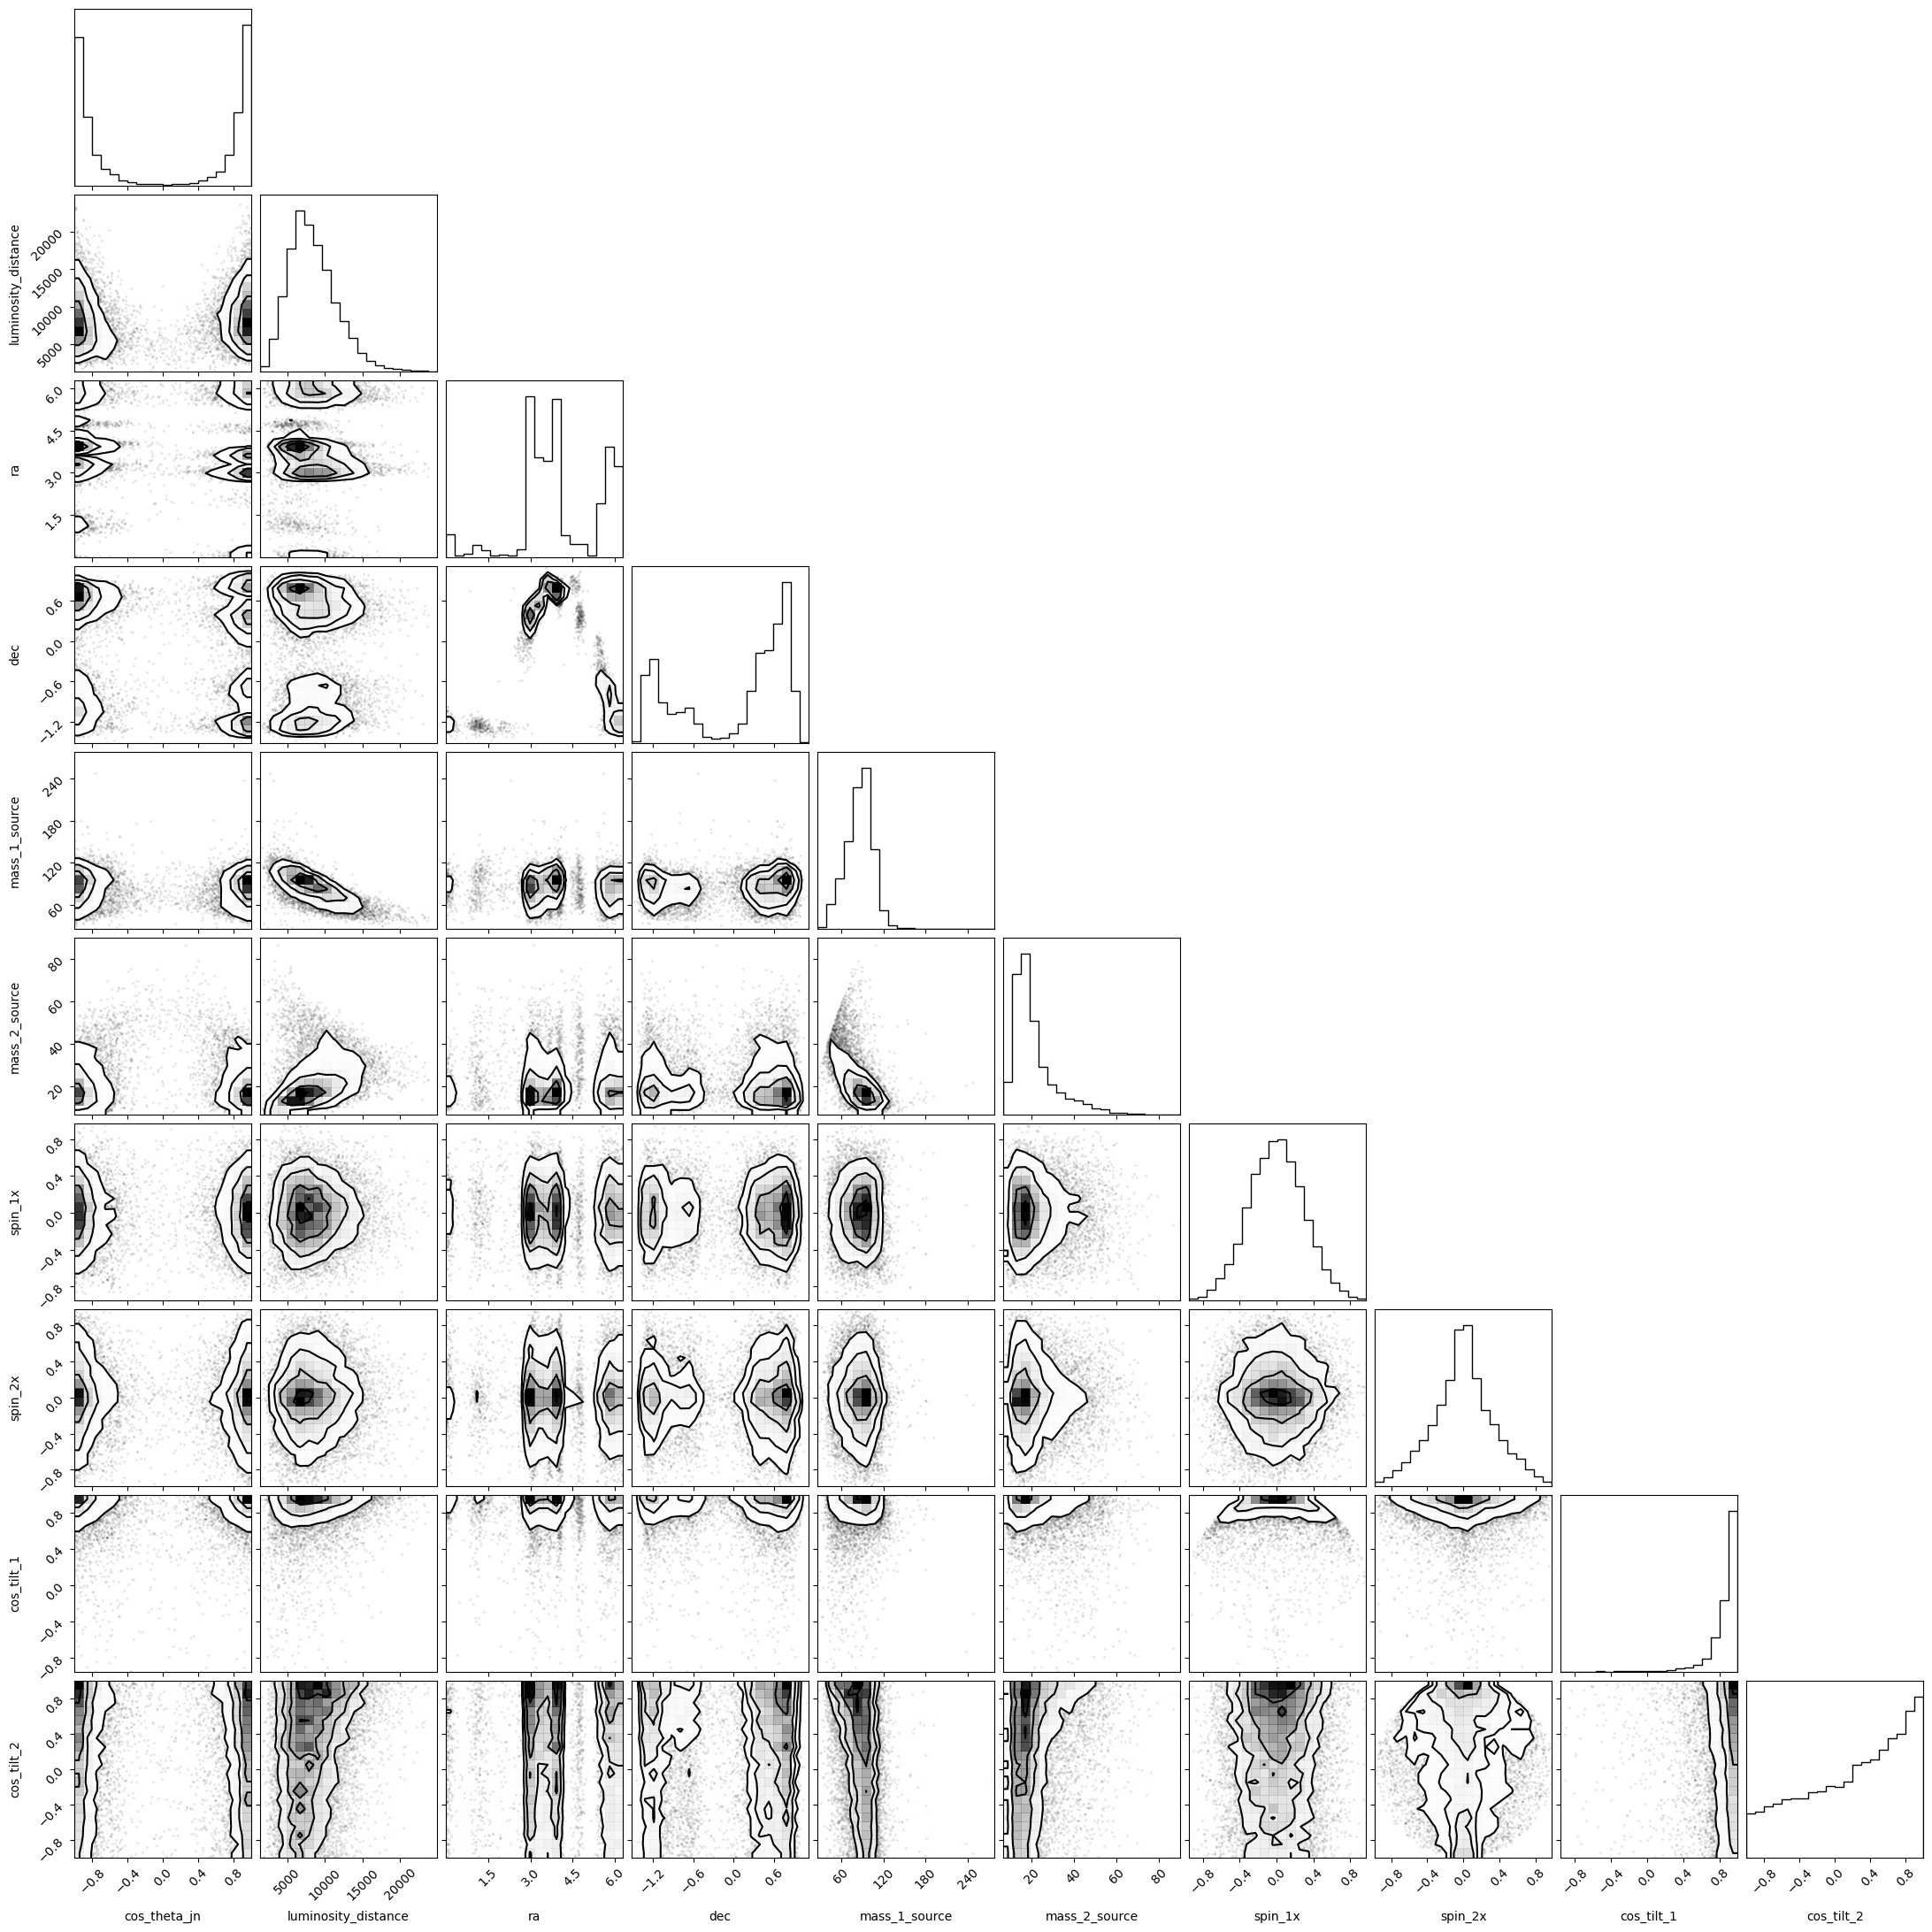

In [16]:
# Ensure only relevant columns are selected for the corner plot
columns_for_corner = [
    'cos_theta_jn', 'luminosity_distance', 'ra', 'dec',
    'mass_1_source', 'mass_2_source',
    'spin_1x', 'spin_2x', 'cos_tilt_1', 'cos_tilt_2'
]
samples_for_corner = samples[columns_for_corner]

# Plot using corner
corner.corner(samples_for_corner, labels=columns_for_corner)
plt.show()

In [22]:
import h5py
import pandas as pd
import numpy as np
import bilby

# Define the path to the downloaded HDF5 file
posterior_file = "IGWN-GWTC2p1-v2-GW190403_051519_PEDataRelease_mixed_cosmo.h5"

# Load the posterior data
posterior = h5py.File(posterior_file, 'r')

# Print datasets and names to inspect the file structure
print('This file contains the following groups:', list(posterior.keys()))

# Assuming the group structure is similar to the provided example
# Access the specific group containing posterior samples
posterior_samples_group = posterior['C01:IMRPhenomXPHM']['posterior_samples']

# Convert the posterior samples to a DataFrame
samples_df = pd.DataFrame(np.array(posterior_samples_group))

# Print the parameter names to confirm availability
print('Parameter names in the posterior samples:', posterior_samples_group.dtype.names)

# Define the parameters of interest
parameters = ['phase', 'geocent_time', 'chirp_mass', 'mass_ratio']

# Extract values for the specified parameters
extracted_values = {param: samples_df[param] for param in parameters}

# Define prior distributions based on the extracted values
priors = bilby.core.prior.PriorDict()

# Example priors based on extracted values
priors['phase'] = bilby.core.prior.Uniform(
    name='phase',
    minimum=extracted_values['phase'].min(),
    maximum=extracted_values['phase'].max()
)
priors['geocent_time'] = bilby.core.prior.Uniform(
    name='geocent_time',
    minimum=extracted_values['geocent_time'].min(),
    maximum=extracted_values['geocent_time'].max()
)
priors['chirp_mass'] = bilby.core.prior.Uniform(
    name='chirp_mass',
    minimum=extracted_values['chirp_mass'].min(),
    maximum=extracted_values['chirp_mass'].max()
)
priors['mass_ratio'] = bilby.core.prior.Uniform(
    name='mass_ratio',
    minimum=extracted_values['mass_ratio'].min(),
    maximum=extracted_values['mass_ratio'].max()
)

# Print the defined priors
print("Defined priors for Bayesian inference:")
for key in priors:
    print(f"{key}: {priors[key]}")


This file contains the following groups: ['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']
Parameter names in the posterior samples: ('chirp_mass', 'mass_ratio', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'theta_jn', 'psi', 'phase', 'azimuth', 'zenith', 'recalib_H1_amplitude_0', 'recalib_H1_amplitude_1', 'recalib_H1_amplitude_2', 'recalib_H1_amplitude_3', 'recalib_H1_amplitude_4', 'recalib_H1_amplitude_5', 'recalib_H1_amplitude_6', 'recalib_H1_amplitude_7', 'recalib_H1_amplitude_8', 'recalib_H1_amplitude_9', 'recalib_H1_phase_0', 'recalib_H1_phase_1', 'recalib_H1_phase_2', 'recalib_H1_phase_3', 'recalib_H1_phase_4', 'recalib_H1_phase_5', 'recalib_H1_phase_6', 'recalib_H1_phase_7', 'recalib_H1_phase_8', 'recalib_H1_phase_9', 'recalib_L1_amplitude_0', 'recalib_L1_amplitude_1', 'recalib_L1_amplitude_2', 'recalib_L1_amplitude_3', 'recalib_L1_amplitude_4', 'recalib_L1_amplitude_5', 'recalib_L1_amplitude_6', 'recalib_L1_amplitude_7', 'recalib_L1_amplitude